### The Normal Equation

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
X=2*np.random.rand(100,1)

In [27]:
X[:10]

array([[0.27110584],
       [1.21936011],
       [0.78776243],
       [0.41500613],
       [1.66440542],
       [0.4310033 ],
       [1.45902493],
       [0.80877827],
       [1.93260729],
       [1.79252534]])

In [46]:
y=4+3*X+np.random.randn(100,1)#Gaussian noise

Text(0, 0.5, 'y')

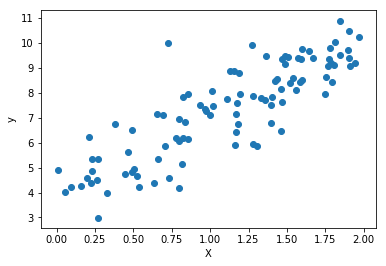

In [47]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')

In [48]:
#Compute parameter using Normal Equation
#add x0=1 tp each instance
X_b=np.c_[np.ones((100,1)),X]

### Normal Equation 
$$ \theta = (X^T X)^{-1}X^T \vec{y} $$

In [49]:
# compute the inverse of a matrix using inv() from np.linalg and dot() for matrix multiplication
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [50]:
theta_best

array([[4.05269678],
       [2.96868951]])

In [178]:
#predict using theta_best
X_new=np.array([[0],[2]])

array([[0],
       [2]])

In [74]:
X_new_b=np.c_[np.ones((2,1)),X_new]

In [75]:
y_predict=X_new_b.dot(theta_best)

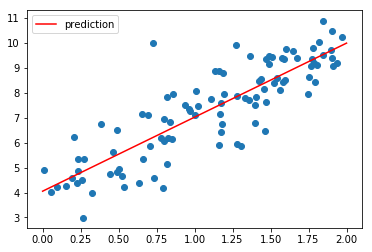

In [80]:
plt.scatter(X,y)
plt.plot(X_new,y_predict,color='r',label='prediction')
plt.legend()
plt.show()

In [88]:
#Use Scikit Learn to compute
#LinearRegression based on scipy.linalg.lstsq() least squares
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.05269678]), array([[2.96868951]]))

In [89]:
lin_reg.predict(X_new)

array([[4.05269678],
       [9.99007579]])

**Computational Complexity**

Computational Complexity of Normal Equation is between 2.4 power of n and 3 power of n ( n is the number of features )

While SVD approach used by Scikit-Learn is about 2 power of n

### Batch Gradient Descent
Gradient vector of the cost function ( missing equation ) 

In [119]:
eta=0.1 #learning rate

In [120]:
n_iterations=1000 
#set large and then early stop when gradient vector become less than tolerance

In [121]:
m=100 #number of observations 

In [122]:
theta=np.random.randn(2,1)

In [123]:
import time
start=time.time()
for i in range(n_iterations):
    gradient=2/m*X_b.T.dot(X_b.dot(theta)-y)
    theta=theta-eta*gradient
print(time.time()-start)

0.007736682891845703


In [124]:
theta

array([[4.05269678],
       [2.96868951]])

### Stochastic Gradient Descent

In [131]:
n_epochs=50
t0,t1=5,50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

In [132]:
theta=np.random.randn(2,1)

In [135]:
start=time.time()
for epoch in range(n_epochs):
    for i in range(m):
        randox_index=np.random.randint(m)
        xi=X_b[randox_index:randox_index+1]
        yi=y[randox_index:randox_index+1]
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learning_schedule(epoch*m+i)
        theta=theta-eta*gradients
print(time.time()-start)

3.7732889652252197


In [136]:
theta

array([[4.05801437],
       [2.96994458]])

In [137]:
# Use Stochastic GD with scikit learn
from sklearn.linear_model import SGDRegressor

In [139]:
sgd_reg=SGDRegressor(max_iter=1000,tol=1e-3,eta0=0.1)

In [143]:
sgd_reg.fit(X,y)

/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(eta0=0.1)

In [144]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.06953108]), array([3.02313351]))

### Polynomial Regression

In [291]:
#first generate some nonlinear data
m=100
X=6*np.random.randn(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

Text(0.5, 1.0, 'nonlinear scatterplot')

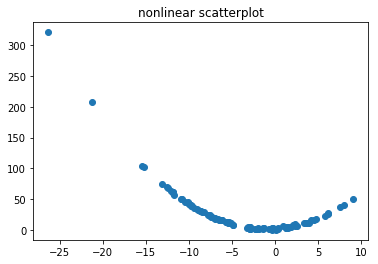

In [292]:
plt.scatter(X,y)
plt.title('nonlinear scatterplot')

In [157]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0],X_poly[0]

(array([-3.04644983]), array([-3.04644983,  9.28085658]))

In [158]:
poly_Reg=LinearRegression()
poly_Reg.fit(X_poly,y)
poly_Reg.intercept_,poly_Reg.coef_

(array([1.97161733]), array([[1.02442414, 0.52137619]]))

In [197]:
curve=lambda X: 1.02442414*X**2 + 0.52137619*X +1.97161733

ValueError: x and y must have same first dimension, but have shapes (100, 1) and (1,)

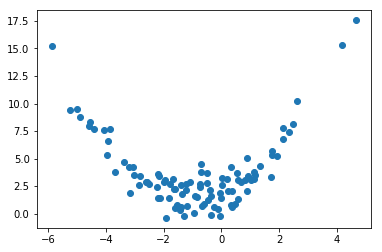

In [198]:
plt.scatter(X,y)
plt.plot(X,curve)
plt.title('nonlinear scatterplot')

In [184]:
#X_new=np.array([[-2],[4]])

In [185]:
#X_poly_new=poly_features.transform(X_new)

In [186]:
#y_new=poly_Reg.predict(X_poly_new)

### learning curve

In [262]:
#build learning curve function to generate train vs val RMSE on the same plot for different 
#sized subsets of the training set
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.base import clone

In [283]:
def plot_training_curve(model,X,y):
    train_perf,test_perf=[],[]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    for i in range(1,len(X_train)):
        ml=clone(model)
        ml.fit(X_train[:i],y_train[:i])
        y_train_predict=ml.predict(X_train[:i])
        y_test_predict=ml.predict(X_test)
        train_perf.append(mean_squared_error(y_train[:i],y_train_predict))
        test_perf.append(mean_squared_error(y_test,y_test_predict))
    plt.plot(np.sqrt(train_perf),label='train')
    plt.plot(np.sqrt(test_perf),label='val')
    plt.legend()

In [299]:
#first use simple linear regression model
lin_reg=LinearRegression()

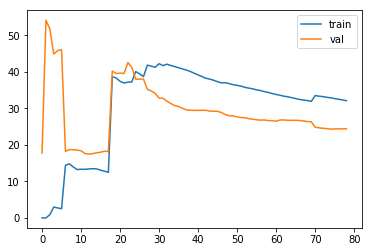

In [300]:
plot_training_curve(lin_reg,X,y)

LinearRegression is underfitting the dataset
*  train and val both reach a plateau
*  they are close and fairly high

In [233]:
#then use 10 degree polynominal on the same dataset
from sklearn.pipeline import Pipeline

In [303]:
pipe=Pipeline([('poly_feature',PolynomialFeatures(degree=10,include_bias=False)),
              
            ('lin_reg',LinearRegression())])

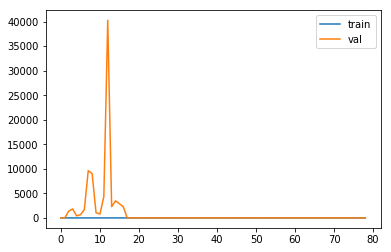

In [304]:
plot_training_curve(pipe,X,y)

Polynomial is overfitting the dataset
* model perform on train set much better than on validation set
* train set and valid set have big gap 

### Regularize Linear Models

#### Ridge Regression

In [305]:
from sklearn.linear_model import Ridge

In [306]:
ridge_reg=Ridge(alpha=1)

In [307]:
ridge_reg.fit(X,y)

Ridge(alpha=1)

In [309]:
ridge_reg.predict([[1.5]])

array([[1.39926982]])

In [310]:
#using stochastic gradient descent
sgd_reg=SGDRegressor(penalty='l2')

In [311]:
sgd_reg.fit(X,y)

/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor()

In [312]:
sgd_reg.predict([[1.5]])

array([-11.24233695])

#### Lasso Regression

In [313]:
from sklearn.linear_model import Lasso

In [314]:
lasso_reg=Lasso(alpha=0.1)

In [315]:
lasso_reg.fit(X,y)

Lasso(alpha=0.1)

In [316]:
lasso_reg.predict([[1.5]])

array([1.40719622])

In [317]:
#using stochastic gradient descent
sgd_reg=SGDRegressor(penalty='l1')

In [318]:
sgd_reg.fit(X,y)

/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(penalty='l1')

In [319]:
sgd_reg.predict([[1.5]])

array([1.48245659])

#### Elastic Net Regression

In [320]:
from sklearn.linear_model import ElasticNet

In [324]:
elastic_net=ElasticNet(alpha=0.1,l1_ratio=0.6)

In [325]:
elastic_net.fit(X,y)

ElasticNet(alpha=0.1, l1_ratio=0.6)

In [326]:
elastic_net.predict([[1.5]])

array([1.42666757])

#### Early Stopping

In [328]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2)
minimun_val_error=float("inf")
best_epoch=None
best_model=None
for epoch in range(1000):
    sgd_reg.fit(X_train,y_train)
    y_val_predict=sgd_reg.predict(X_val)
    val_error=mean_squared_error(y_val,y_val_predict)
    if val_error<minimun_val_error:
        minimun_val_error=val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/julie/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [329]:
best_epoch,best_model

(804, SGDRegressor(penalty='l1'))

### Decision Boundaries

In [330]:
from sklearn import datasets
iris=datasets.load_iris()

In [334]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [338]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [348]:
list(set(iris['target']))

[0, 1, 2]

In [373]:
X=iris['data'][:,3:]

In [351]:
y=(iris['target']==2).astype(int)

In [353]:
from sklearn.linear_model import LogisticRegression

In [361]:
log_reg=LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()